In [60]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from model import NN

In [61]:

transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

Test = datasets.ImageFolder(root='archive/test', transform=transform)
Test_loader = DataLoader(Test, shuffle=True)

In [62]:
device  = "cuda" if torch.cuda.is_available() else "cpu"
model   = NN().to(device)
model.load_state_dict(torch.load('weights.pth'))
lossFunc = torch.nn.CrossEntropyLoss()

Guess: angry;  Answer: happy


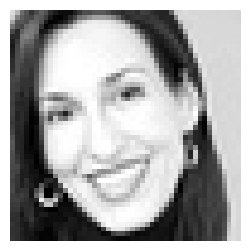

Guess: neutral;  Answer: neutral


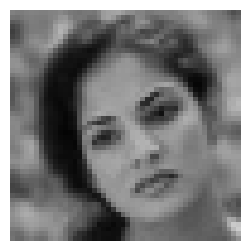

Guess: angry;  Answer: neutral


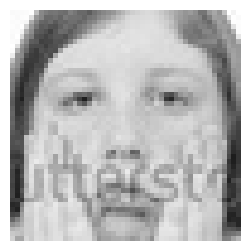

Guess: angry;  Answer: sad


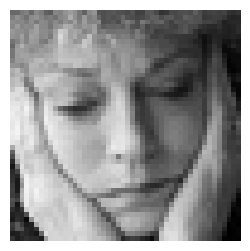

Guess: angry;  Answer: angry


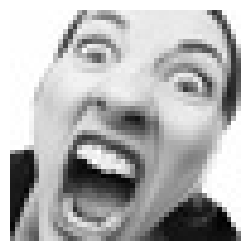

angry: 4779
disgust: 0
fear: 0
happy: 0
neutral: 2399
sad: 0
surprise: 0
Accuracy 1127/7178


In [63]:
model.eval()

five = 1
N = n = 0

guesses = [0] * 7

for img, label in Test_loader:
    logit = model(img)
    guess = logit.argmax(dim=1).item()
    img = img.squeeze([0,1])

    if guess == label.item():
        n += 1
    N += 1
    
    guesses[guess] += 1
    
    # print random examples
    if five <= 5 and np.random.rand() > 0.999:
        five += 1
        print(f"Guess: {Test_loader.dataset.classes[guess]};  Answer: {Test_loader.dataset.classes[label.item()]}")
        # un-normalize in-place
        img_unnorm = img * 0.5 + 0.5
        np_img = img_unnorm.squeeze().cpu().numpy()
        plt.figure(figsize=(3,3))
        plt.imshow(np_img, cmap='gray', vmin=0, vmax=1)
        plt.axis('off')
        plt.show()
for i in range(7):
    print(f"{Test_loader.dataset.classes[i]}: {guesses[i]}")
print(f"Accuracy {n}/{N}")